In [1]:
import numpy as np

# Redes Neuronais Aritifiais

# Introdução

Redes neuronais são baseadas em um paradigma conexionista ao invés do simbólico (introduzido por [Von Neumann](https://pt.wikipedia.org/wiki/John_von_Neumann)) utilizado pela maioria das linguagens computacionais formais. No modelo simbólico são utilizados predicados que quando processados sequencialmente dão instruções exatas em como um determinado processo deve ser executado, por um outro lado no [paradigma conexionista](https://pt.wikipedia.org/wiki/Conexionismo "Wikipedia: Conexionismo") o processamento é feito através de redes interconectadas que são individualmente simples.

![Rede de Neurônios](rede_neuronio_bio.jpg "Rede de Neurônios")

O modelo de inspiração para a criação das redes neuronais é o cérebro humano que é capaz de resolver problemas relacionados com *identificação de padrões* de forma extremamente eficiente e rápida. Este modelo (como modelo que é) não tem objetivo de ser a representação real do modelo biológico, mas sim uma visão simplificada deste sistema que tem como entidade elementar o neurônio. Desta forma temos a visão do *comportamento coletivo* da rede de células.

![Esturutra do Neuronio](estrutura-neuronio.jpg "Estrutura do Neurônio")

O cérebro humano contém uma quantidade enorme de neurônios $ 10^{11} $, cada neurônio é conectado a outros em uma ligação do *dentrito* com o *terminal do axônio*. O sinal elétrico recebido pelos dentritos de um ou mais neurônios é processado no corpo celular através de reações bioquímicas se esta reação é significativa o suficiente o pulso é repassado para o axônio que propaga este sinal para outros neurônios conectados no terminal desta célula.

De forma simplificada temos o modelo conhecido como **Neurônio de McCulloch-Pitts**, onde cada entrada $I_n$ tem um peso $W_n$ que pode ser positivo (um estímulo) ou negativo (uma inibição), é então somado e passa por uma função limiar (threshold), caso a soma seja maior que este limiar esta informação é propagada na saída (imagem da função).

![Neurônio de McCulloch-Pitts](mcculloch_pits_neuron.png "Neurônio de McCulloch-Pitts")

Representamos este entidade através da seguinte equação para um dado neurônio $i$:

\begin{equation}\label{eq:nmcp_discreto}
n_i (t+1)  = \Theta \left( \sum_j W_{ij} I_j(t) - T_i \right) \; \; \; \text{ onde } 0 < j < N \in \mathbb{N}
\end{equation}

Neste caso $n_i(t)$ pode ser $0$ ou $1$ e representa o estado do neurônio entre *passando* ou *não-passando* o determinado sinal. O tempo $t$ é discreto e $\Theta(x)$ é a função [Heaviside](https://pt.wikipedia.org/wiki/Fun%C3%A7%C3%A3o_de_Heaviside).

Já foi demonstrado (onde?) que uma ordenação sincrona de neurônios é capaz de fornecer o [princípio de computação universal](https://pt.wikipedia.org/wiki/M%C3%A1quina_de_Turing_universal) para pesos $w_{ij}$ escolhidos arbitrariamente.

As principais diferenças entre um neurônio biológico e o de McCulloch-Pitts são que, os reais normalmente não se asemelham a um dispositivo de limite, ao invés disso respondem de forma contínua (**resposta graduada**), por outro lado a hipótese do autor é que ponto tido como essencial para a simulação da rede neuronal é a **não linearidade** que é mantida no modelo simplista baseado em limites.

Outro ponto é que as células realizam uma soma *não linear*, permitindo fazer algo similar a operações lógicas, esta estrutura é possível de ser simulada utilizando mais níveis em um neurônio McCulloch-Pitts.

Neurônios biológicos são assíncronos e respondem o estímulo gerando uma sequência de pulsos ao invés de um único pulso "binário". A transmissão assíncrona é tratada no Neurônio de McCulloch-Pitts (NMCP de agora em diante), por outro lado muitos especialistas acreditam que a fase do pulso não tem papel fundamental (mas não de aceitação geral).

A generalização simplista que contém estas caracteristias é dada pela equação:

\begin{equation}\label{eq:nmcp_continuo}
n_i := g \left( \sum_j W_{ij} n_j - T_i  \right)
\end{equation}

Aqui a função limite $\Theta(x)$ foi substituída por uma função contínua e não linear $g(x)$ conhecida como **funcão de transferência**.

O cérebro atua então como um sistema de processamento paralelo extremamente eficiente no quesito de paralelismo. Onde cada processador realiza uma operação simples que é a soma das entradas aplicadas seu peso e da como saída um número único, uma função **não-linear**. Podemos pensar nestes pesos como dados armazenados pelos processadores.

Este alto paralelismo, mostra que a soma possuirá muitos termos, significando que erros de poucas entradas tem **pouco impacto** de uma forma mais geral.

Devemos lembrar que o tempo de resposta da rede neuronal biológica é da ordem de milissegundos enquanto de um computador clássico é da ordem de pico segundos, ainda assim, o cérebro humano é capaz de executar muitas tarefas de forma muito mais eficiente do que um computador como reconhecimento de imagens, identificação de dados ruidosos e controle motor.

## Para pensar

Inicialmente pode-se pensar (eu pensei) que o paralelismo levado as últimas consequências é a *panacea*, mas antes perguntas devem ser feitas e respondidas, como:

* Quantas camadas e conexões devem ser feitas?
* Quais são funções ideais para ser usadas como função de transferência $g(x)$?
* A rede pode ser treinada?
* Como treinar a rede?
* Usar um modelo síncrono ou assíncrono?
* Quão rápida é a rede para cada uma das tarefas dadas?
* É robusta? Suporta falhas ou perda de informação?
* Podemos generalizar tarefas?
* Que tipo de informações pode representar?
* Pode ser construída com as ferramentas existentes?


# Modelo Hopfield

## Problema da memória associativa

O problema mais elementar é dado por:

> Armazenado um conjunto de $p$ padrões $\xi^{\mu}$ de uma forma que quando apresentado a um novo padrão $\zeta_0$, a rede deve responder com o padrão que mais se assemelha à $\zeta_0$ dos padrões armazenados.

Numeramos cada um dos padrões com inteiros $\mu = 1, 2, \ldots, p$, enquanto as unidades (células) são numeradas com $i = 1,2, \ldots, N$. Ambos $\xi^{\mu}$ (padrões armazenados) e os padrões de teste $\zeta^\nu$ podem ser dados como $0$ ou $1$ em cada local $i$ representados individualmente como $\xi_i^{\mu}$ e $\zeta_i^{\nu}$.

Assim um padrao armazenado $\xi^{\mu}$ e' formado por $\xi^{\mu} = \left( \xi^{\mu}_1, \xi^{\mu}_2, \ldots, \xi^{\mu}_p \right)$ interpretado como um vetor e representamos o i-esimo elemento o $\mu$-esimo padrao como $\xi^{\mu}_i$. O mesmo se da com $\zeta^{\nu}$.


Para implementar isso em um computador convencional utilizamos a lista de padrões e escrevemos um programa que calcula a [distância de Hamming](https://pt.wikipedia.org/wiki/Dist%C3%A2ncia_de_Hamming). Matematicamente teríamos:

\begin{equation}\label{eq:dist_hamming}
H(\xi^{\mu}) = \sum_i \left[ \xi_i^{\mu} (1 - \zeta_i) + (1- \xi_i^{\mu}) \zeta_i \right]
\end{equation}

Como por definição nossos padrões são somente $0$ ou $1$, a função soma incrementar em 1 vai realizar somas cada vez que os valores forem diferentes, e incrementar 0 quando forem iguais.

 $\xi$ | $\zeta$ | $\xi\left(1-\zeta\right)$ | $\left(1-\xi\right)\zeta$ | $\sum$ 
 :---: | :---: | :---: | :---: | :---:
  0  |  0  |  0  |  0  |  0 
  1  |  0  |  1  |  0  |  1 
  0  |  1  |  0  |  1  |  1
  1  |  1  |  0 |   0  |  0 


Em outras palavras a distância de Hamming é uma distância espacial que mede quanto dois vetores $u$ e $v$ unidimensionais diferem em suas componentes.

Para fins práticos (e sem preocupação com performance ou eficiência) vamos fazer um exemplo computacional, seja a função de distância Hamming definida por:

In [3]:
def hamming_norm(u, v):
    # A formula exata e' menos eficiente (duas vezes mais lenta)
    # np.sum(u*(1-v)+v*(1-u))
    return np.sum(u != v)

Para dois vetores $u$ e $v$ dados por:

In [4]:
size=100000
u = np.random.randint(2,size=size,dtype=np.int8)
v = np.random.randint(2,size=size,dtype=np.int8)

Calculamos a distancia de Hamming

In [5]:
hamming_norm(u,v)

50050

Podemos perceber que o menor valor da desta distância é 0, quando os vetores são idênticos e quanto maior este valor, menos similaridade há entre os dois vetores. (poderíamos normalizar esta valor, dividindo pela norma do vetor, assim obter um valor entre $0$ e $1$). Outra consequência que podemos notar é que caso o número de componentes (dimensões) deste vetores seja muito grande, erros locais terão pouco impacto (estatísticamente) nesta distância.

## O Modelo

Seja $S^t$ o estado do sistema no instante $t$, fazemos de $S_i^t$ a representacao do estado do $i$-esimo neuronio no instante $t$.

Definimos os valores de $S_i$ como $+1$ ativado e $-1$ nao ativado. A dinamica do estado do sistema e' dada por:

\begin{align}
h_i & = \sum_j W_{ij}S_j \\
S_i & = sgn \left( h_i - T_i\right) \\ 
S_i & = sgn \left( \sum_j W_{ij} S_j - T_i\right) \\ 
sgn(x) & = 
\begin{cases}
+1 \; x \ge 0 \\
-1 \; x \lt 0
\end{cases}
\end{align}

Sendo $T_i$  o limiar de ativacao da i-esima celula e $h_i$ o estado deste mesmo neuronio em respeito aos $j$-neuronios conectados.

Escolhemos esta definicao ao inves do $n_i$ previamente apresentado que definia $1$ para ativado e $0$ para nao ativado.

Desta forma $S_i$ pode ser escrito equivalentemente como:

$$ S_i = 2 n_i -1 \;\; n_i \in \{0,1\}$$

Se $n_i = 0$

$$ S_i = 2 \cdot 0 -1 = -1 $$

Se $n_i = 1$

$$ S_i = 2 \cdot 1 - 1 = 1 $$

Vamos demonstrar que esta escolha e' equivalente dado um limiar bem definido.

### Demonstracao

Fazendo $x = \sum_j W_{ij} (2n_j-1) - T_i$. Abrindo o somatorio temos:

\begin{align}
\sum_j W_{ij} (2n_j-1) &- T_i \\
\sum_j \left( 2 n_j W_{ij} -  W_{ij} \right) & - T_i  \\
\sum_j 2 n_j W_{ij} - \sum_j W_{ij} & - T_i \\
2 \sum_j n_j W_{ij} - \sum_j W_{ij} & - T_i
\end{align}

Substituindo de volta:

$$S_i = sgn \left( 2 \sum_j n_j W_{ij} - \sum_j W_{ij} - T_i
\right)$$


Para a funcao $sgn(x)$ temos dois possiveis valores $1$ e $-1$. Para o primeiro caso teriamos obrigatoriamente $x \ge 0$ desta forma:

\begin{align}
2 \sum_j n_j W_{ij} - \sum_j W_{ij} - T_i & \ge 0 \\
2 \sum_j n_j W_{ij} - \sum_j W_{ij} & \ge T_i  \\
2 \sum_j n_j W_{ij} & \ge \sum_j W_{ij} +  T_i  \\
  \sum_j n_j W_{ij} & \ge \frac{1}{2} \left( \sum_j W_{ij} + T_i \right)
\end{align}

Desta forma quando $x \ge 1$ temos:

$$\mu_i = \frac{1}{2}  \left( \sum_j W_{ij} + T_i \right)$$

Por outro lado quando a $x \lt 0$ temos:

\begin{align}
2 \sum_j W_{ij} n_j - \sum_j W_{ij} - T_i & \lt 0 \\
2 \sum_j W_{ij} n_j - \sum_j W_{ij} & \lt T_i  \\
2 \sum_j W_{ij} n_j & \lt \sum_j W_{ij} +  T_i  \\
  \sum_j W_{ij} n_j & \lt \frac{1}{2} \left( \sum_j W_{ij} + T_i \right)
\end{align}

Alem disso o limiar $T_i$ esta relacionado com $\mu_i$.

Em $\mu_i$ isolamos $T_i$

\begin{align}
\mu_i &= \frac{1}{2}  \left( \sum_j W_{ij} + T_i \right) \\
2 \mu_i &= \sum_j W_{ij} + T_i \\
T_i &= 2 \mu_i - \sum_j W_{ij}
\end{align}

Para simplificar podemos considerar o limiar sendo $0$ assim fazemos $T_i=0 \; \forall i$. Desta forma ficamos com:

$$S_i = sgn \left( \sum_j W_{ij} S_j\right)$$


Assim sendo a equacao de ativacao e representada pelo grafico

<center>![Funcao Ativacao](funcaoativ_11.png)</center>

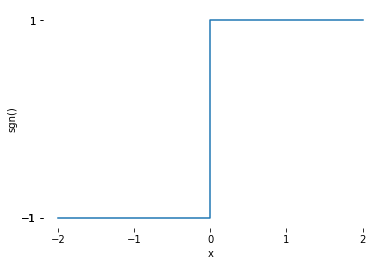

In [30]:
import matplotlib.pyplot as plt

x=np.array([-2,-1,0,1,2])
y=np.where(x<=0,-1,1)
fig, ax = plt.subplots()
plt.step(x,y)
plt.xticks(x)
plt.yticks(y)
plt.xlabel('x')
plt.ylabel('sgn()')
for s in  ax.spines.values():
    s.set_visible(False)
plt.show()

### Tipos de atualizacao

As atualizacoes do sistema no modelo de *Hopfield* podem ser *sincronas* ou *assincronas*.

**sincrono**: todos os neuronios se atualizam sincronamente, isto e todos os estados do tempo futuro sao baseados no instante anterior. Matematicamente:

$$S_i^{t+1} = sgn \left( \sum_j W_{ij} S_j^t \right)$$

**assincrono**: as atualizacoes sao feitas desordenadas, onde cada neuronio e' atualizado por vez. Usados em modelos autonomos. Existem duas escolhas possiveis para este modelo.

 - a cada instante uma unidade aleatoria e' escolhida e atualizada; ou
 
 - cada unidade escolhe um intervalo proprio de atualizacao de forma independente.
 

### Rede de Hopfield

Dada uma rede com $p$ neuronios. A rede *Hopfield* e' uma rede **completamente conexo**, isto e' cada um dos seus elementos esta conectado a todos os outros elementos.



### Convergencia e estabilidade 

Quando nao ha mais atualizacoes dos estados entre instantes de tempos ou seja $S^{t+1}_i = S^t_i$ dizemos que o estado do neuronio encontra-se estabilizado.

Ou seja dado um sistema que tenha armazenado padrao $\xi^1$, ao atribuirmos um valor inicial ao sistema $S^0$ aplicada a equacao do movimento $S_i$, o sistema ira convergir para um (e somente um) dos estados armazenados $\xi^1$ ou $-\xi^1$, .

#### Convergencia no modelo de um unico padrao

Vamos supor que $\xi$ e' um atrator, isto e': ele representa um dos estados de estabilidade. Temos entao:

$$sgn \left( \sum_j^N W_{ij} \xi_j \right) = \xi_j \;\; \forall i$$

Fazendo:

\begin{align}
W_{ij} & \propto \xi_i \xi_j \\
 & = b \xi_i \xi_j
\end{align}

Substituindo temos:

$$sgn \left( \sum_j^N b \xi_i \xi_j \xi_j \right) = \xi_j$$

Como $\xi_j^2 = 1$. Pois $1^2 = \left(-1\right)^2 = 1.$

\begin{align}
sgn \left( \sum_j^N b \xi_i \right) = \xi_j \\
sgn \left( b \xi_i \sum_j^N 1 \right) = \xi_j \\
sgn \left( b N \xi_i \right) = \xi_j
\end{align}

Assim:

$$W_{ij} = sgn(\xi_i) = \xi_j = W_{ij}$$


Por isso por conveniencia podemos entao tomar $W_{ij}$ da seguinte maneira:

$$
W_{ij} = \begin{cases}
\frac{1}{N} \xi_i \xi_j, & i \ne j \\
0, &i = j
\end{cases}
$$

Onde $N$ e' o numero de unidades na rede.

Esta modelo converge mesmo se um numero (menor do que a metade) dos bits do padrao inicial $S^0$ estiverem erradas, isto e:

$$
H\left(S^0, \xi^{\mu}\right) \le \left\lceil \frac{N}{2} -1 \right\rceil
$$

Sendo $H(\cdot, \cdot)$ a norma de Hamming

Definimos entao o complementar da norma de Hamming como:

$H^\perp = N - H(\cdot, \cdot)$

A interpretacao e' o numero de neuronios que estao em desacordo entre dois estados.

Podemos tambem definir como:

\begin{align}
H       &= \sum_{\substack{j=1 \\ j\ne i \\ \xi_j = S_j}}^N \xi_j S_j \\
H^\perp &= \sum_{\substack{j=1 \\ j\ne i \\ \xi_j \ne S_j}}^N \xi_j S_j 
\end{align}

Seja a entrada para o i-esimo neuronio $h_i$ dada por:

$$
h_i = \sum_{j=1}^N W_{ij} S_j = \frac{1}{N} \xi_i \left( H + H^\perp \right)
$$

Como por hipotese temos que o numero de elementos coincidentes da norma de Hamming e' maior que a metade do numero de termos entao:

$$
H + H^\perp > 1 = c
$$

Assim sendo:

$$
h_i = \frac{c}{N} \xi_i > 0
$$

Desta forma os neuronios que estao em concordancia nao alteram conforme o estado do sistema evolua. O padrao e' completamente recuperado, demonstrando que a rede corrige os erros.

Por outro lado se tivessemos iniciado com uma quantidade maior que a metade de neuronios diferente, teriamos que todos os neuronios de $S$ e $\xi$ concordantes trocariam de estado que levaria para convergencia em $-\xi$ e estabilizaria. Estes padroes sao chamados de **atratores**.

### Multiplos padroes

Para fazermos o sistema lembrar do padrao mais parecido fazemos $W_{ij}$ uma superposicao de todos os termos para cada padrao assim:

\begin{equation}
W_{ij} = \begin{cases}
\frac{1}{N} \sum_{\mu=1}^{p} \xi_i^{\mu} \xi_j^{\mu}, & i \ne j \\
0, &i = j
\end{cases},
\;\;\forall i,j
\end{equation}

onde $p \ge 1$ e' o numeo de padroes armazenados na rede, nomeado $\mu$.

Esta forma e' conhecida como **Regra de Hebb** da aprendizagem, ou **Regra de Hebb generalizada**. Que diz que os pesos sinapticos mudam em resposta com a experiencia, ou seja ha uma correlacao prporcional entre o disparo dos neuronios pre e pos sinapticos.

O modelo matematico vai alem do modelo de **Hebb** pois se nenhum dos dois neuronios ativarem seu peso ira ser positivamente reforcado:

$$ 
\xi_i^\mu = \xi_j^\mu = -1 \implies \xi_i^\mu \xi_j^\mu = 1
$$

Que provavelmente nao possui correlacao fisiologica.

#### Estabilidade multiplos padroes

Seja a condicao geral de estabilidade dada por:


$$sgn ( h_i^\nu ) = \xi_j \;\; \forall i$$

onde a entrada $h_i^\nu$ para a unidade $i$ no padrao $\nu$ e dada por:

$$h_i^\nu \equiv \sum_{j=1}^N W_{ij} \xi_j^\nu = \frac 1 N  \left( \sum_{\substack{j=1\\ j \ne i}}^N \sum_{\mu=1}^p \xi_i^\mu \xi_j^\mu \xi_j^\nu \right)$$

Separando o termo quando $\mu = \nu$.

$$h_i^\nu = \frac{N-1}{N} \xi_i^\nu + \frac 1 N  \left( \sum_{\substack{j=1\\ j \ne i}}^N \sum_{\substack{\mu=1 \\ \mu \ne \nu}}^p \xi_i^\mu \xi_j^\mu \xi_j^\nu \right)$$

O segundo termo e' chamado de **termo de diafonia(crosstalk)**.

### Operando a diafonia

Vamos definir entao:

$$
\sigma_i^\nu = \left( \sum_{\substack{j=1\\ j \ne i}}^N \sum_{\substack{\mu=1 \\ \mu \ne \nu}}^p \xi_i^\mu \xi_j^\mu \xi_j^\nu \right)
$$

Desta forma, podemos reescrever a entrada $h_i^\nu$ como

$$h_i^\nu = \frac{N-1}{N} \xi_i^\nu + \frac 1 N \sigma_i^\nu$$

Seja entao

$$\frac{1}{N} \sigma_i^\nu < \frac{N-1}{N} \xi_i^\nu$$

Entao os padroes armazenados sao estaveis. Isto quer dizer que se iniciarmos o sistema com um dos padroes armazenados ele ira convergir. Isto eh cada um dos padroes do sistema sao atratores e o sistema funciona como uma *memoria de conteudo enderecavel*.

Por outro lado se:

$$\frac{1}{N} \sigma_i^\nu \ge \frac{N-1}{N} \xi_i^\nu$$

Para algum padrao $\xi^\mu_i$ de  $\xi^\mu$ e' instavel.

E' esperado que mais padroes se tornem instaveis na medida em que $p$ cresce. Isto e' quanto mais padroes adicionarmos a rede.

#### Devaneios

Temos:

\begin{align}
\frac{1}{N} \sigma_i^\nu &< \frac{N-1}{N} \xi_i^\nu \\
\frac{N}{N} \sigma_i^\nu &< \frac{N-1}{1} \xi_i^\nu \\
            \sigma_i^\nu &< \left(N-1\right)\xi_i^\nu \\
\end{align}

Tambem:
\begin{align}
\sigma_i^\nu &< \left(N-1\right)\xi_i^\nu \\
\sigma_i^\nu &< N\xi_i^\nu - \xi_i^\nu \\
\sigma_i^\nu + \xi_i^\nu &< N\xi_i^\nu  \\
\frac{\sigma_i^\nu + \xi_i^\nu}{\xi_i^\nu} &< N \\
\end{align}


## Definicao (**Modelo de Hopfield**)

E' o modelo de memoria associativa utilizando a regra de Hebb para todos os pares $ij$, com unidades binarias e atualizacao assincrona e' chamado de **Modelo de Hopfield**.

Basea-se na ideia de utilizar memorias armazenadas como atratores dinâmicos.

## Capacidade de Armazenamento

Seja a equação:

\begin{align}
C_i^\nu \equiv -\xi_i^\nu  \frac 1 N \sum_j \sum_{\mu \neq \nu} \xi_i^\mu \xi_j^\mu \xi_j^\nu
\end{align}

In [ ]:
#